In [1]:
%pylab inline
from astropy import units
from astropy import constants
from cosmotools import rvir, concentration
from profiles import *
import os.path

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
# Constants
h = 0.7
H = 67.8*units.km/units.s/units.Mpc
H_code = 3.2407789E-18/units.s*0.7
print H_code
print G, H.to(1/units.s)

2.26854523e-18 1 / s
4.51835939627e-39 kpc3 / (s2 solMass) 2.19724835826e-18 1 / s


Here we model of the MW, our first model is for a MW of mass $ M_{vir}=1E12 M\odot$.
The MW have a bulge a disk and dark matter halo:

- The MW Bulge have a mass of $M_b = 1E10 M\odot$ this is modeled with a 
Hernquist profile with scale length $r_b = 0.7 kpc$.

- The disk of the MW have a mass of $M_d = 6.5E10 M\odot$ and is modeled as ...

- The Dark Matter halo have a total mass of $M_h = M_{vir} - M_d - M_b$


$M_h = M_{vir} - M_b - M_d =  1E12 - 6.5E10 - 1E10 = 9.25E11 M\odot$

# MW model:

## Facundo's models:
From http://adsabs.harvard.edu/abs/2015ApJ...802..128G

In [23]:
cc1 = 9.86 # # NFW concentration for the 1x10^12Msun halo 
cc2 = 9.56 # NFW concentration for the 1.5x10^12Msun halo 
cc3 = 9.359 # NFW concentration for the 2x10^12Msun halo 
ra = 3.5 # Disk scale length
rb = 0.53 # Disk high
c = 0.7 # Bulge scale length

In [24]:
r = linspace(0.1, 300, 1000)
Vc_Halo1 = vc_NFW(cc1, 0, r, 0, 1E12)
Vc_Disk1 = vc_mn(3.5, 0.53, 0, r, 0, 6.5E10)
Vc_bulge1 = vc_hernquist(0.7, 0, r, 0, 1E10)
Vc_MW1 = np.sqrt(Vc_Halo1**2 + Vc_Disk1**2 + Vc_bulge1**2)

Vc_Halo2 = vc_NFW(cc2, 0, r, 0, 1.5E12)
Vc_Disk2 = vc_mn(3.5, 0.53, 0, r, 0, 5.5E10)
Vc_bulge2 = vc_hernquist(0.7, 0, r, 0, 1E10)
Vc_MW2 = np.sqrt(Vc_Halo2**2 + Vc_Disk2**2 + Vc_bulge2**2)

Vc_Halo3 = vc_NFW(cc3, 0, r, 0, 1E12)
Vc_Disk3 = vc_mn(3.5, 0.53, 0, r, 0, 5E10)
Vc_bulge3 = vc_hernquist(0.7, 0, r, 0, 1E10)
Vc_MW3 = np.sqrt(Vc_Halo3**2 + Vc_Disk3**2 + Vc_bulge3**2)

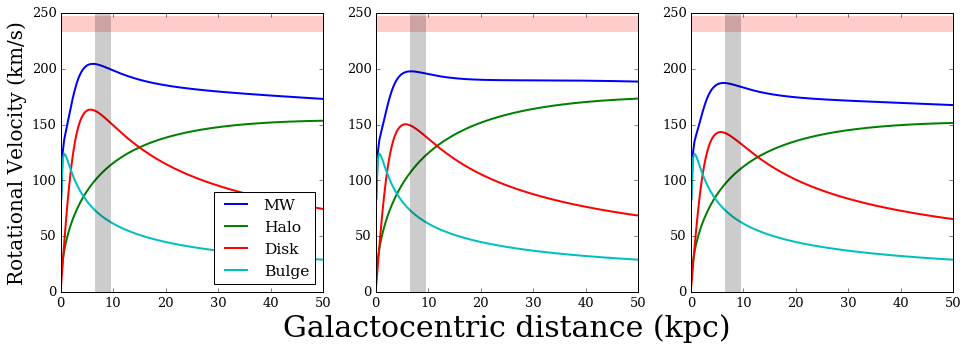

In [25]:
figure(figsize=(16, 5))
subplot(1, 3, 1)
plot(r, Vc_MW1, lw=2, label='MW')
plot(r, Vc_Halo1, lw=2, label='Halo')
plot(r, Vc_Disk1, lw=2, label='Disk')
plot(r, Vc_bulge1, lw=2, label='Bulge')
legend(loc='lower right')
#axhline(170, lw=16, alpha=0.2)
axhline(240, lw=16, alpha=0.2, c='r')
axvline(8, lw=16, alpha=0.2, c='k')
ylabel('Rotational Velocity (km/s)', fontsize=20)
xlim(0, 50)

subplot(1, 3, 2)
plot(r, Vc_MW2, lw=2, label='Total')
plot(r, Vc_Halo2, lw=2, label='Halo')
plot(r, Vc_Disk2, lw=2, label='Disk')
plot(r, Vc_bulge2, lw=2, label='Bulge')
#axhline(170, lw=16, alpha=0.2)
axhline(240, lw=16, alpha=0.2, c='r')
axvline(8, lw=16, alpha=0.2, c='k')
xlabel('Galactocentric distance (kpc)', fontsize=30)
xlim(0, 50)

subplot(1, 3, 3)
plot(r, Vc_MW3, lw=2, label='Total')
plot(r, Vc_Halo3, lw=2, label='Halo')
plot(r, Vc_Disk3, lw=2, label='Disk')
plot(r, Vc_bulge3, lw=2, label='Bulge')
#axhline(170, lw=16, alpha=0.2)
axhline(240, lw=16, alpha=0.2, c='r')
axvline(8, lw=16, alpha=0.2, c='k')
xlim(0, 50)
savefig('facundos_models.png', bbox_inches='tight')

----------------------------------------------

# Chervin's model:



In [27]:
Vc_Ch = 175
cc_200 = 9.6

In [28]:
# The R200, M200 and Rs200 values corresponding to the rotational velocity are:
#Here I use the same equations that GalIC have.
def GalIC(v200, cc):
    v200 = v200 * units.km  / units.s
    R200 = v200 / (10.0 * H_code)
    M200 = v200**3.0 / (10*H_code*G)
    Rs200 = R200 / cc
    R200 = R200.to('kpc')
    M200 = M200.to('Msun')
    Rs200 = Rs200.to('kpc')
    return R200, M200, Rs200

In [29]:
R200, M200, Rs200 = GalIC(Vc_Ch, cc_200)
print R200
print M200
print Rs200

250.000030044 kpc
1.77964875655e+12 solMass
26.0416697963 kpc


In [224]:
# This is the rotation curve from GalIC of Chervin's model
Crot_curve = loadtxt('chervinMW_rotcurve.txt', skiprows=1)
r = Crot_curve[:,0] / 0.7
MW = Crot_curve[:,1]
a = Crot_curve[:,2]
b = Crot_curve[:,3]
c = Crot_curve[:,4]

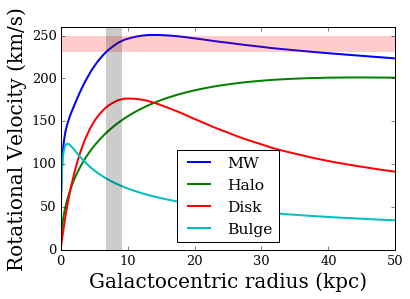

In [65]:
plot(r, MW, lw=2, label='MW')
plot(r, a, lw=2, label='Halo')
plot(r, b, lw=2, label='Disk')
plot(r, c, lw=2, label='Bulge')
#axhline(170, lw=16, alpha=0.2)
axhline(240, lw=16, alpha=0.2, c='r')
axvline(8, lw=16, alpha=0.2, c='k')
legend(loc='best')
xlim(0, 50)
ylim(0, 260)
ylabel('Rotational Velocity (km/s)', fontsize=20)
xlabel('Galactocentric radius (kpc)', fontsize=20)
savefig('chervins_model.png', bbox_inches='tight')

In [17]:
# The mass of the disk and bulge are set by Md and Mb

In [164]:
Md = 0.0524 
Mb = 0.0082
Mdisk = Md * M200
Mbulge = Mb * M200
M200halo = M200 - M200*Md - M200 * Mb
print M200halo
print 'Disk', M200*Md/1E10
print 'Bulge', M200*Mb/1E10

1.6718020419e+12 solMass
Disk 9.32535948431 solMass
Bulge 1.45931198037 solMass


### The Halo mass at Rvir for the NFW profile is:

In [159]:
# Method from http://adsabs.harvard.edu/abs/2012ApJ...753....8V
def fx(x):
    f = np.log(1.+x) - (x / (1. + x))
    return f

#Computing cvir from c200
def c(cvir, c200):
    q = 2.058
    y = (c200 / cvir) - (fx(c200) / (q * fx(cvir)))**(1./3.)
    return y

def bissection(c200):
    min_cvir = 0.1
    max_cvir = 2*c200
    c_init = 0.5 * (min_cvir + max_cvir)
    y = c(c_init, c200)
    while abs(y) > 0.0002:
        #print c_init
        if y<0:
            max_cvir = c_init
        if y>0:
            min_cvir = c_init
        c_init = 0.5*(min_cvir + max_cvir)
        y = c(c_init, c200)
    return c_init

# Compouting a/rs using cvir
def ars(c):
    x = 1 / ((2.0*fx(c))**(-0.5) - (1.0/c)) # Van Der Marel exact solution#
    x2 = np.sqrt(2.0 * (log(1 + c) - c/(1+c))) # springel approx equation
    return x, x2

# Funally computing mvir from m200

def m200mvir(m200, ar, c):
    f = log(1+c) - c/(1+c)
    mvir = m200 * 2 * f / ar**2 
    return mvir

def m200mvirNFW(Mvir, cvir, c200):
    M200 = Mvir * fx(c200) / fx(cvir)
    return M200
    
    

In [210]:
cvir = bissection(9.6)
print cvir
a_rs = ars(cvir)
a_rs200 = ars(cc_200)
print "avir/rsvir = ", a_rs
print "a200/rs200 = ", a_rs200 * Rs200

12.8675292969
avir/rsvir =  (2.1535646579005023, 1.8448094667192605)
a200/rs200 =  [ 54.02783217  44.42671657] kpc


In [184]:
Mvir_halo1 = m200mvir(M200halo.value, a_rs[0], cvir) 
Mvir_halo2 = m200mvir(M200halo.value, a_rs[1], cvir) 

MDisk = Mvir_halo * Md 
MBulge = Mvir_halo * Mb 

print "halo Virial Mass", Mvir_halo1
print "disk mass", Mvir_halo1 * Md / 1E10
print Mvir_halo1 * Mb / 1E10

M200NFW1 = m200mvirNFW(Mvir_halo1, cvir, 9.6)
M200NFW2 = m200mvirNFW(Mvir_halo2, cvir, 9.6)

print M200NFW1, M200NFW2


1.6718020419e+12
8.76024269956
1.37087767436
1.04910703501e+12 1.42965942928e+12


## Halo

In [85]:
print Rs200

26.0416697963 kpc


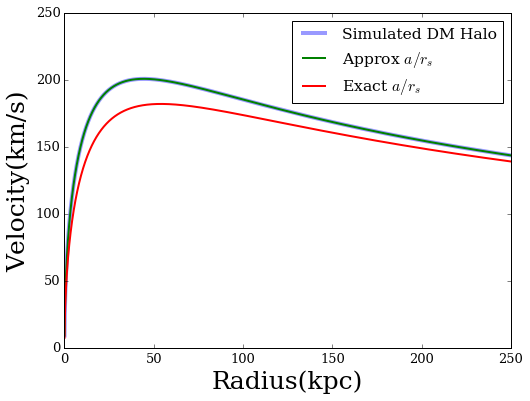

In [234]:
figure(figsize=(8, 6))
a_teoNFW = vc_NFW(cc_200, 0, r, 0, M200halo.value)
a_teoHern1 = vc_hernquist(44.42, 0, r, 0, M200halo.value)#Boom!
a_teoHern2 = vc_hernquist(54.02, 0, r, 0, M200halo.value)
plot(r, a, lw=4, label='Simulated DM Halo', alpha=0.4) 
plot(r, a_teoHern1, lw=2, label='Approx $a/r_s$', ls='-')
plot(r, a_teoHern2, lw=2, label='Exact $a/r_s$')
legend(loc='best')
#xlim(0, 50)
xlabel('Radius(kpc)', fontsize=25)
ylabel('Velocity(km/s)', fontsize=25)

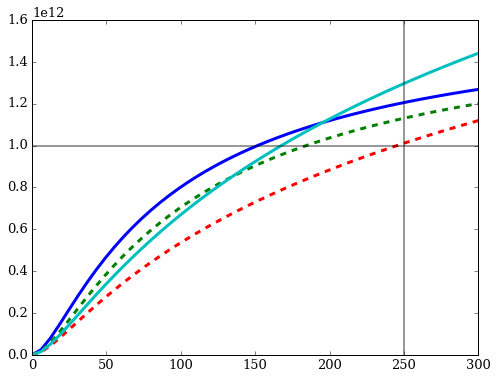

In [238]:
figure(figsize=(8, 6))
r2 = linspace(0, 300)
m1_enclosed = mass_hernquist(44.42, r2, M200halo.value)
m2_enclosed = mass_hernquist(54.02, r2, M200halo.value)
m3_enclosed = mass_NFW(cc_200, r2, 0, 0, M200NFW1)
m4_enclosed = mass_NFW(cc_200, r2, 0, 0, M200NFW2)


plot(r2, m1_enclosed, lw=3, ls='-')
plot(r2, m2_enclosed, lw=3, ls='--')
plot(r2, m3_enclosed, lw=3, ls='--')
plot(r2, m4_enclosed, lw=3)
axhline(1E12, lw=2, c='k', alpha=0.4)
axvline(R200.value, lw=2, c='k', alpha=0.4)

## Disk

In [119]:
print Mdisk
print MDisk
    

93253594843.1 solMass
64284066934.2 solMass


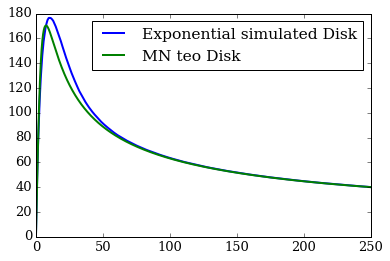

In [233]:
b_teo = vc_mn(4.63, 0.69,  0, r, 0, Mdisk.value)
plot(r, b, lw=2, label='Exponential simulated Disk')
#plot(r, b_teo, lw=2, label='Disk')
plot(r, b_teo, lw=2, label='MN teo Disk')
legend()

## Bulge

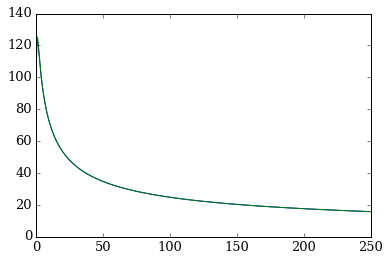

In [227]:
c_teo = vc_hernquist(1.0, 0, r, 0, Mbulge.value)
#a_teo = vc_mn(cvir, 0, r, 0, Mvir_halo)
plot(r, c)
plot(r, c_teo)

-------------------------------------------------------------

# Nico's Model

In [141]:
MDisk = 6.5E10
MBulge = 1E10
Mvir = 1E12
MW_halo = Mvir - MDisk - MBulge
print MW_halo

def halo_properties(M):
    MW_halo_c = concentration(M)
    MW_halo_rvir = rvir(M, 0)
    R_H1 = MW_halo_rvir / MW_halo_c 
    return MW_halo_c, MW_halo_rvir, R_H1

9.25e+11


In [150]:
Halo_c, Halo_rvir, Halo_rs = halo_properties(1E12)
print Halo_c, Halo_rvir, Halo_rs

9.8602716532 262.562957446 kpc 26.6283695502 kpc


In [184]:
!python GalIC_input.py  1E12 0 26.62 13.86

This code assume that your initial parameters are Mvir(NFW), Rvir(NFW) and Rs(NFW)
Vvir (NFW) 128.045993773 km / s
cvir(NFW) =  13.86
c200(NFW) =  10.3608959961
a200 =  55.764718082
avir =  57.8758105495
M200 =  859697735113.0
M_h_200 =  1.24248211463e+12
M_h_vir =  1.33833642022e+12
v_h_200 =  155.247041299 km / s
v_h_vir =  141.108906788 km / s
a_200 Volker =  42.5341022138 kpc


------------------------------------------

In [173]:
# Halo
a_halo = 55.415
M_halo_hern = 1.4668E12
teo_mass = mass_hernquist(a_halo ,r, M_halo_hern)

teo_den = dens_hernquist(a_halo, r, M_halo_hern)

teo_vc = vc_hernquist(a_halo, r, 0, 0, M_halo_hern)
#teo_vc_volk = vc_hernquist(55.525, r, 0, 0, M_halo_hern)

# Bulge 
Mbulge = 1E10
abulge = 0.7
teo_bulge_vc = vc_hernquist(abulge, r, 0, 0, Mbulge)

# Disk

Mdisk = 7.5E10
teo_disk_vc = vc_mn(2.5, 4.0/5.0 ,r, 0, 0, Mdisk)


# MW

teo_MW_vc = np.sqrt(teo_bulge_vc**2 + teo_disk_vc**2 + teo_vc**2)

In [174]:
# Models
#-----------------------------------------
M_chervin_halo = 92.94E10 / h # from lsf.out of GalIC 200
A_chervin_halo = 28.1096 / h  # 200
print "chervin = ", M_chervin_halo, A_chervin_halo

chervin =  1.32771428571e+12 40.1565714286


# Data from simulations

In [175]:
IC_chervin = loadtxt('../ICs/MW_models/MW1/chevin_rotcurve.txt', skiprows=1)
IC_MW = loadtxt('../ICs/MW_models/MW1/rotcurve.txt', skiprows=1)

In [176]:
#------------- chervin --------------------
r = IC_chervin[:,0] / h
vc_chervin_MW = IC_chervin[:,1]
vc_chervin_halo = IC_chervin[:,2]
vc_chervin_disk = IC_chervin[:,3]
vc_chervin_bulge = IC_chervin[:,4]

# ------------- Nico ---------------------
vc_MW_r = IC_MW[:,0] / h
vc_MW = IC_MW[:,1]
vc_MW_halo = IC_MW[:,2]
vc_MW_disk = IC_MW[:,3]
vc_MW_bulge = IC_MW[:,4]

(0, 50)

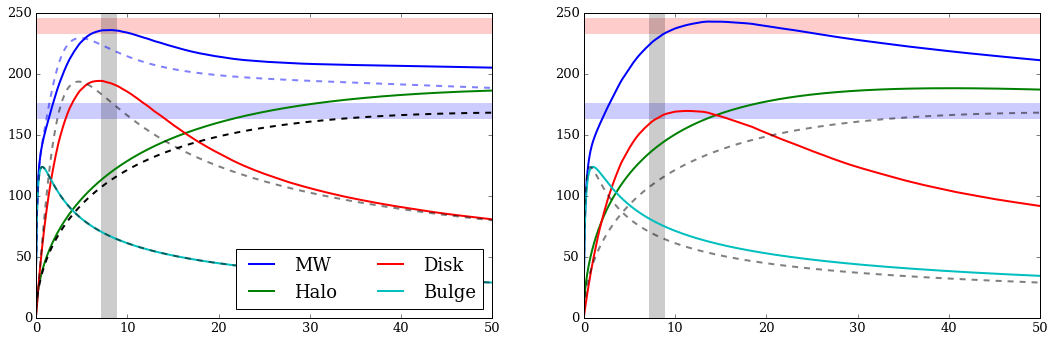

In [177]:
figure(figsize=(18, 12))

ax1 = subplot(2, 2, 1)
ax1.axhline(170, lw=16, alpha=0.2)
ax1.axhline(240, lw=16, alpha=0.2, c='r')
ax1.axvline(8, lw=16, alpha=0.2, c='k')
ax1.plot(vc_MW_r, vc_MW, lw=2, label='MW')
ax1.plot(vc_MW_r, vc_MW_halo, lw=2, label='Halo')
ax1.plot(vc_MW_r, vc_MW_disk, lw=2, label='Disk')
ax1.plot(vc_MW_r, vc_MW_bulge, lw=2, label='Bulge')
ax1.plot(r, teo_vc, c='k', ls='--', lw=2, alpha=1)
ax1.plot(r, teo_bulge_vc, c='k', ls='--', lw=2, alpha=0.5)
ax1.plot(r, teo_disk_vc, c='k', ls='--', lw=2, alpha=0.5)
ax1.plot(r, teo_MW_vc, c='b', ls='--', lw=2, alpha=0.5)
ax1.legend(loc='lower right', fontsize=18, ncol=2)
xlim(0, 50)

ax2 = subplot(2, 2, 2)
ax2.axhline(170, lw=16, alpha=0.2)
ax2.axhline(240, lw=16, alpha=0.2, c='r')
ax2.axvline(8, lw=16, alpha=0.2, c='k')
ax2.plot(r, vc_chervin_MW, lw=2)
ax2.plot(r, vc_chervin_halo, lw=2)
ax2.plot(r, vc_chervin_disk, lw=2)
ax2.plot(r, vc_chervin_bulge, lw=2)
ax2.plot(r, teo_vc, c='k', ls='--', lw=2, alpha=0.5)
ax2.plot(r, teo_bulge_vc, c='k', ls='--', lw=2, alpha=0.5)
xlim(0, 50)


In [164]:
# Disk Scale length:

def H_disk():
    H = 3.5 * 0.7 
    c = 9.91
    Rvir = 178.961
    fc = log(1.0 + c) - c / (1 + c)
    L = 2 * H * fc / (sqrt(2) * Rvir) 
    print sqrt(2) / 2.0 * Rvir / fc
    return L

In [165]:
H_disk()

85.425787979


0.028679864218548408

In [166]:
(85.425 * 0.0286) / 0.7

3.4902214285714286

In [167]:
mass_MW_NFW = mass_NFW(9.918, r280, 0, 0, 9.25E11)
dens_MW_NFW = dens_NFW(9.918, r280, 0, 0, 9.25E11) 

#mass_MW_chervin =  mass_hernquist(40.15, r,  1.327E12)

NameError: name 'r280' is not defined

In [ ]:
figure(figsize=(8, 6))
plot(r280, teo_mass260, label='Hernquist', lw=2)
plot(r280, mass_MW_NFW, label='NFW', lw=2)
#plot(r, mass_MW_chervin)
axvline(255.82)
axhline(9.25E11)
legend(loc='best')
savefig('../doc/MW_enclosedM.png', bbox_inches='tight')

In [ ]:
figure(figsize=(8, 6))
plot(r280, log10(teo_den260.value), label='Hernquist', lw=2)
plot(r280, log10(dens_MW_NFW.value), label='NFW', lw=2)
#plot(r, mass_MW_chervin)
#axvline(261)
#axhline(1E12)
legend(loc='best')
#rvir(1E12, 0)
savefig('../doc/MW_enclosedRho.png', bbox_inches='tight')

In [ ]:
# Nico's model

In [ ]:
GalIC(142, 9.6)